In [2]:
%config IPCompleter.use_jedi=False

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

## PCA

In [4]:
input_array = []
for img_name in sorted(os.listdir('./four_dataset/')):
    img = Image.open(os.path.join('./four_dataset/', img_name))
    img = np.array(img).reshape(-1)
    input_array.append(img)

In [5]:
input_array = np.array(input_array).T
input_array.shape

(784, 982)

In [6]:
def PCA(input_array, dim=2):
    # Normalize input array
    mu = np.mean(input_array, axis=1)
    zero_mean_input_array = input_array - np.array([mu for i in np.arange(input_array.shape[1])]).T
    
    # Use SVD to fine priciple components
    U, Sigma, V = np.linalg.svd(zero_mean_input_array)
    
    # Access top_dim priciple components
    reduced = U.T[:dim]@zero_mean_input_array
    
    # Reconstruction
    reconstructed = U[:,:dim]@reduced + np.array([mu for i in np.arange(input_array.shape[1])]).T
    
    return reconstructed

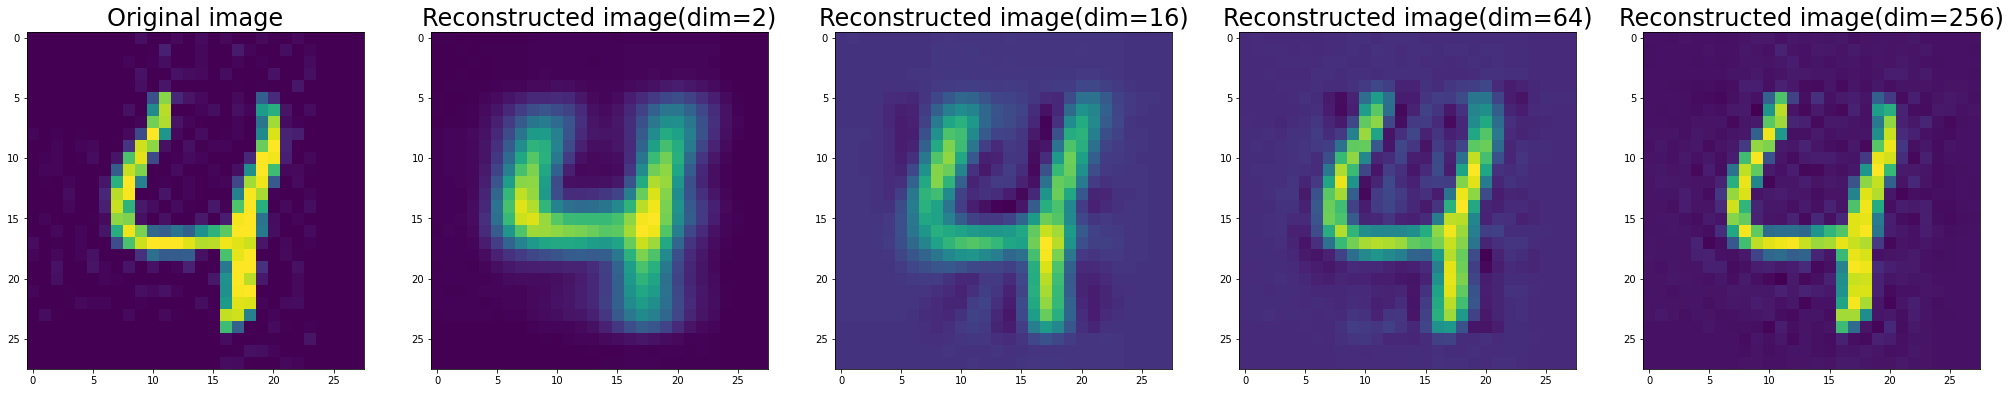

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(35, 7))
axs[0].imshow(input_array[:,0].reshape(28,28))
axs[0].set_title('Original image', fontsize=24)

for i, dim in enumerate([2,16,64,256]):
    reconstructed = PCA(input_array, dim=dim)
    axs[1+i].imshow(reconstructed[:,0].reshape(28,28))
    axs[1+i].set_title('Reconstructed image(dim='+str(dim)+')', fontsize=24)
plt.show()

## NMF

In [13]:
from sklearn.preprocessing import normalize

In [14]:
input_array = []
for img_name in sorted(os.listdir('./mixture_dataset(0147)/')):
    img = Image.open(os.path.join('./mixture_dataset(0147)/', img_name))
    img = np.array(img).reshape(-1)
    input_array.append(img)

In [15]:
input_array = np.array(input_array).T
input_array.shape

(784, 1000)

In [16]:
def NMF(input_array, dim=4, num_iter = 3000, delta = 1e-5):
    V = input_array
    W = np.random.rand(V.shape[0], 4)
    H = np.random.rand(4, V.shape[1])

    for idx in range(num_iter):
        # Update H
        deno = (W.T@W@H)
        deno[deno==0] = delta
        numer = (W.T@V)
        for i in range(H.shape[0]):
            for j in range(H.shape[1]):
                H[i,j] = H[i,j]*numer[i,j]/deno[i,j]
        # Update W
        deno = (W@H@H.T)
        deno[deno==0] = delta
        numer = (V@H.T)
        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                W[i,j] = W[i,j]*numer[i,j]/deno[i,j]
                
        # To avoid NaN
        H = np.nan_to_num(H)
        W = np.nan_to_num(W)
        # Print Forbinous norm
        norm = np.linalg.norm(V - W@H, 'fro')
        if idx%100 == 0:
            print("Iter ", idx, ":", norm)
    return W, H

In [17]:
W, H = NMF(input_array, dim=4)

Iter  0 : 10877.580894157485
Iter  100 : 2968.8589628118602
Iter  200 : 2883.1523689066516
Iter  300 : 2862.8001593347726
Iter  400 : 2853.521186348547
Iter  500 : 2847.837541207608
Iter  600 : 2844.413226411349
Iter  700 : 2842.0997538145234
Iter  800 : 2840.689435537672
Iter  900 : 2839.767109896954
Iter  1000 : 2839.173372319568
Iter  1100 : 2838.660482014645
Iter  1200 : 2838.14802788189
Iter  1300 : 2837.8490260939157
Iter  1400 : 2837.625059238153
Iter  1500 : 2837.4448035788955
Iter  1600 : 2837.327647333916
Iter  1700 : 2837.2291285171973
Iter  1800 : 2837.1424191151227
Iter  1900 : 2837.0746857211943
Iter  2000 : 2836.990692484454
Iter  2100 : 2836.9455559634002
Iter  2200 : 2836.901970413085
Iter  2300 : 2836.87174642631
Iter  2400 : 2836.8453141335044
Iter  2500 : 2836.820366364822
Iter  2600 : 2836.7964736850035
Iter  2700 : 2836.767809151504
Iter  2800 : 2836.739401047103
Iter  2900 : 2836.710222557919


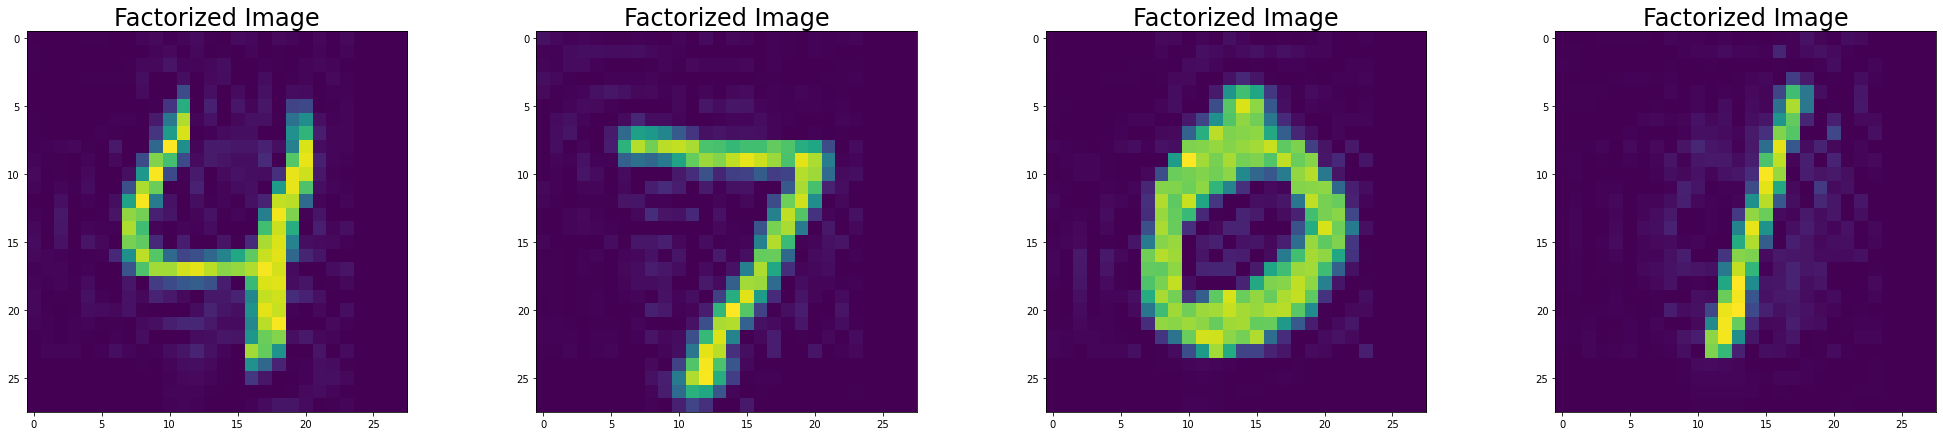

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(35, 7))

for i in range(W.shape[1]):
    axs[i].imshow(W[:,i].reshape(28,28))
    axs[i].set_title('Factorized Image', fontsize=24)
plt.show()